# Table on Content
    1. Importing Libraries & data and Cleaning Columns
    2. Grouping
      2.1. Marital Status
      2.2. Age
      2.3. Income      
      2.4. Dependance
    3. Customer Profiles
      3.1. Profiles Creation
      3.2. Distribution of profiles
      3.3. Profiles and Marital Status
      3.4. Profiles and Age
      3.5. Profiles and Income
      3.6. Profiles and Dependants          
    4. Analysis of Customer Profiles: 
      4.1. Usage frequency
      4.2. Expenditure
      4.3. Regions
      4.4. Departments
    5. Exporting dataframe

# 1. Importing Libraries & data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path
path = r'/Users/Dulce/12-2023 Instacart Basket Analysis'

In [3]:
# Import final_df
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Final_DF.pkl'))

In [4]:
# Create a color palette with 10 distinct colors
colors = ['#FFB6C1', '#FFA7B9', '#FF98B2', '#FF89AA', '#FF7AA2', '#FF6B9A', '#FF5C93', '#FF4D8B', '#FF3E83', '#FF2F7B']

In [5]:
instacart.head()

,product_id,product_name,department_id,prices,order_id,user_id,eval_set,quantity,orders_day_of_week,order_hour_of_day,...,frequency_flag,State,Age,Children,Marital_Status,income,region,activity_flag,department,_merge
0,1,Chocolate Sandwich Cookies,19,5.8,3139998,138,prior,28,6,11,...,Frequent customer,Minnesota,81,1,married,49620,Midwest,Non-Low Activity,snacks,both
1,1,Chocolate Sandwich Cookies,19,5.8,1977647,138,prior,30,6,17,...,Frequent customer,Minnesota,81,1,married,49620,Midwest,Non-Low Activity,snacks,both
2,4913,Table Water Crackers,19,4.4,894221,138,prior,23,5,13,...,Frequent customer,Minnesota,81,1,married,49620,Midwest,Non-Low Activity,snacks,both
3,11759,Organic Simply Naked Pita Chips,19,4.4,1986630,138,prior,7,0,12,...,Frequent customer,Minnesota,81,1,married,49620,Midwest,Non-Low Activity,snacks,both
4,13424,Almonds,19,4.2,3139998,138,prior,28,6,11,...,Frequent customer,Minnesota,81,1,married,49620,Midwest,Non-Low Activity,snacks,both


In [6]:
instacart.shape

(32404859, 32)

In [7]:
instacart.columns

Index(['product_id', 'product_name', 'department_id', 'prices', 'order_id',
       'user_id', 'eval_set', 'quantity', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'Busy_day', 'Busy_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_payment',
       'spender_type_flag', 'median_days_since_prior_order', 'frequency_flag',
       'State', 'Age', 'Children', 'Marital_Status', 'income', 'region',
       'activity_flag', 'department', '_merge'],
      dtype='object')

# 2. Grouping

## 2.1. Marital Status

In [8]:
# Group for "Married" = married
instacart.loc[(instacart['Marital_Status'] == 'married'), 'Status'] = 'Married'

In [9]:
# Group for "Non-Married" = single AND divorced/widowed AND living with parents and siblings
instacart.loc[
    (instacart['Marital_Status'] == 'single') |
    (instacart['Marital_Status'] == 'divorced/widowed') |
    (instacart['Marital_Status'] == 'living with parents and siblings'),
    'Status'
] = 'Non-married'

In [10]:
Status_counts = instacart['Status'].value_counts(dropna = False)

In [11]:
# Calculate percentages
Status_percentages = (Status_counts / len(instacart) * 100).round(0).astype(str) + '%'
Status_percentages

Status
Married        70.0%
Non-married    30.0%
Name: count, dtype: object

In [12]:
# Create crosstab for Marital Status
crosstab_status = pd.crosstab(instacart['Status'], instacart['Marital_Status'], dropna=False, normalize='index')

# Multiply the normalized values by 100 to get percentages
crosstab_status_percent = (crosstab_status * 100).round(0).astype(str) + '%'
crosstab_status_percent

Marital_Status,divorced/widowed,living with parents and siblings,married,single
Status,,,,
Married,0.0%,0.0%,100.0%,0.0%
Non-married,29.0%,16.0%,0.0%,55.0%


## 2.2. Age

In [13]:
# Group for Young Adults: <=29 Years-old
instacart.loc[(instacart['Age'] <= 29), 'Age_Group'] = 'Young'

In [14]:
# Group for Adults: 30-59 Years-old
instacart.loc[(instacart['Age'] >= 30) & (instacart['Age'] <= 59), 'Age_Group'] = 'Adult'

In [15]:
# Group for Senior: >= 60 Years-old
instacart.loc[(instacart['Age'] >= 60), 'Age_Group'] = 'Senior'

In [16]:
Age_group_counts = instacart['Age_Group'].value_counts(dropna = False)

In [17]:
# Calculate percentages
Age_group_percentages = (Age_group_counts / len(instacart) * 100).round(0).astype(str) + '%'
Age_group_percentages

Age_Group
Adult     47.0%
Senior    34.0%
Young     19.0%
Name: count, dtype: object

## 2.3 Income

In [18]:
# Group for Low Income: < 50.000
instacart.loc[(instacart['income'] < 50000), 'Income_Group'] = 'Low Income'

In [19]:
# Group for Mid Income: >= 50.000 AND < 10000
instacart.loc[(instacart['income'] >= 50000) & (instacart['income'] < 100000), 'Income_Group'] = 'Mid Income'

In [20]:
# Group for High Income: >= 100000
instacart.loc[(instacart['income'] >= 100000), 'Income_Group'] = 'High Income'

In [21]:
Income_group_counts = instacart['Income_Group'].value_counts(dropna = False)

In [22]:
# Calculate percentages
Income_group_percentages = (Income_group_counts / len(instacart) * 100).round(0).astype(str) + '%'
Income_group_percentages

Income_Group
High Income    46.0%
Mid Income     43.0%
Low Income     11.0%
Name: count, dtype: object

## 2.4 Dependance

In [23]:
# Group for no-dependants: = 0
instacart.loc[(instacart['Children'] == 0), 'Dependance'] = 'No-Dependants'

In [24]:
# Group for dependants: >= 1
instacart.loc[(instacart['Children'] >= 1), 'Dependance'] = 'Dependants'

In [25]:
dependance_counts = instacart['Dependance'].value_counts(dropna = False)

In [26]:
# Calculate percentages
Dependance_percentages = (dependance_counts / len(instacart) * 100).round(0).astype(str) + '%'
Dependance_percentages

Dependance
Dependants       75.0%
No-Dependants    25.0%
Name: count, dtype: object

# 3. Customer Profiles

## 3.1. Profiles Creation

In [27]:
# Non-married, Young, High Income
instacart.loc[
    (instacart['Status'] =='Non-married') & 
    (instacart['Age_Group'] == 'Young') & 
    (instacart['Income_Group'] == 'High Income')
    ,'Customer_Profile'] = 'Non-married, Young, High Income'

In [28]:
# Non-married, Young and Mid Income
instacart.loc[
    (instacart['Status'] =='Non-married') & 
    (instacart['Age_Group'] == 'Young') & 
    (instacart['Income_Group'] == 'Mid Income')
    ,'Customer_Profile'] = 'Non-married, Young, Mid Income'

In [29]:
# Non-married, Young and Low Income
instacart.loc[
    (instacart['Status'] =='Non-married') & 
    (instacart['Age_Group'] == 'Young') & 
    (instacart['Income_Group'] == 'Low Income')
    ,'Customer_Profile'] = 'Non-married, Young, Low Income'

In [30]:
# Non-married, Adult and Low Income
instacart.loc[
    (instacart['Status'] =='Non-married') & 
    (instacart['Age_Group'] == 'Adult') & 
    (instacart['Income_Group'] == 'Low Income')
    ,'Customer_Profile'] = 'Non-married, Adult, Low Income'

In [31]:
# Non-married, Adult and Mid Income
instacart.loc[
    (instacart['Status'] =='Non-married') & 
    (instacart['Age_Group'] == 'Adult') & 
    (instacart['Income_Group'] == 'Mid Income')
    ,'Customer_Profile'] = 'Non-married, Adult, Mid Income'

In [32]:
# Non-married, Adult and High Income
instacart.loc[
    (instacart['Status'] =='Non-married') & 
    (instacart['Age_Group'] == 'Adult') & 
    (instacart['Income_Group'] == 'High Income')
    ,'Customer_Profile'] = 'Non-married, Adult, High Income'

In [33]:
# Non-married, Senior and High Income
instacart.loc[
    (instacart['Status'] =='Non-married') & 
    (instacart['Age_Group'] == 'Senior') & 
    (instacart['Income_Group'] == 'High Income')
    ,'Customer_Profile'] = 'Non-married, Senior, High Income'

In [34]:
# Non-married, Senior and Mid Income
instacart.loc[
    (instacart['Status'] =='Non-married') & 
    (instacart['Age_Group'] == 'Senior') & 
    (instacart['Income_Group'] == 'Mid Income')
    ,'Customer_Profile'] = 'Non-married, Senior, Mid Income'

In [35]:
# Non-married, Senior and Low Income
instacart.loc[
    (instacart['Status'] =='Non-married') & 
    (instacart['Age_Group'] == 'Senior') & 
    (instacart['Income_Group'] == 'Low Income')
    ,'Customer_Profile'] = 'Non-married, Senior, Low Income'

In [36]:
# Married, Young and High Income
instacart.loc[
    (instacart['Status'] =='Married') & 
    (instacart['Age_Group'] == 'Young') & 
    (instacart['Income_Group'] == 'High Income')
    ,'Customer_Profile'] = 'Married, Young, High Income'

In [37]:
# Married, Young and Mid Income
instacart.loc[
    (instacart['Status'] =='Married') & 
    (instacart['Age_Group'] == 'Young') & 
    (instacart['Income_Group'] == 'Mid Income')
    ,'Customer_Profile'] = 'Married, Young, Mid Income'

In [38]:
# Married, Young and Low Income
instacart.loc[
    (instacart['Status'] =='Married') & 
    (instacart['Age_Group'] == 'Young') & 
    (instacart['Income_Group'] == 'Low Income')
    ,'Customer_Profile'] = 'Married, Young, Low Income'

In [39]:
# Married, Adult and Low Income
instacart.loc[
    (instacart['Status'] =='Married') & 
    (instacart['Age_Group'] == 'Adult') & 
    (instacart['Income_Group'] == 'Low Income')
    ,'Customer_Profile'] = 'Married, Adult, Low Income'

In [40]:
# Married, Adult and Mid Income
instacart.loc[
    (instacart['Status'] =='Married') & 
    (instacart['Age_Group'] == 'Adult') & 
    (instacart['Income_Group'] == 'Mid Income')
    ,'Customer_Profile'] = 'Married, Adult, Mid Income'

In [41]:
# Married, Adult and High Income
instacart.loc[
    (instacart['Status'] =='Married') & 
    (instacart['Age_Group'] == 'Adult') & 
    (instacart['Income_Group'] == 'High Income')
    ,'Customer_Profile'] = 'Married, Adult, High Income'

In [42]:
# Married, Senior and High Income
instacart.loc[
    (instacart['Status'] =='Married') & 
    (instacart['Age_Group'] == 'Senior') & 
    (instacart['Income_Group'] == 'High Income')
    ,'Customer_Profile'] = 'Married, Senior, High Income'

In [43]:
# Married, Senior and Mid Income
instacart.loc[
    (instacart['Status'] =='Married') & 
    (instacart['Age_Group'] == 'Senior') & 
    (instacart['Income_Group'] == 'Mid Income')
    ,'Customer_Profile'] = 'Married, Senior, Mid Income'

In [44]:
# Married, Senior and Low Income
instacart.loc[
    (instacart['Status'] =='Married') & 
    (instacart['Age_Group'] == 'Senior') & 
    (instacart['Income_Group'] == 'Low Income')
    ,'Customer_Profile'] = 'Married, Senior, Low Income'

## 3.2. Distribution of profiles

In [45]:
cust_prof_counts = instacart['Customer_Profile'].value_counts(dropna = False)

In [46]:
# Calculate percentages
Cust_prof_percentages = (cust_prof_counts / len(instacart) * 100).round(0).astype(str) + '%'
Cust_prof_percentages

Customer_Profile
Married, Senior, High Income        18.0%
Married, Adult, High Income         16.0%
Married, Adult, Mid Income          15.0%
Non-married, Young, Mid Income       8.0%
Married, Young, Mid Income           8.0%
Non-married, Senior, High Income     6.0%
Married, Senior, Mid Income          6.0%
Non-married, Adult, High Income      5.0%
Non-married, Adult, Mid Income       5.0%
Married, Adult, Low Income           4.0%
Married, Senior, Low Income          2.0%
Non-married, Senior, Mid Income      2.0%
Non-married, Young, Low Income       2.0%
Married, Young, Low Income           1.0%
Non-married, Adult, Low Income       1.0%
Non-married, Senior, Low Income      1.0%
Non-married, Young, High Income      0.0%
Married, Young, High Income          0.0%
Name: count, dtype: object

Text(0, 0.5, 'Customer Profiles')

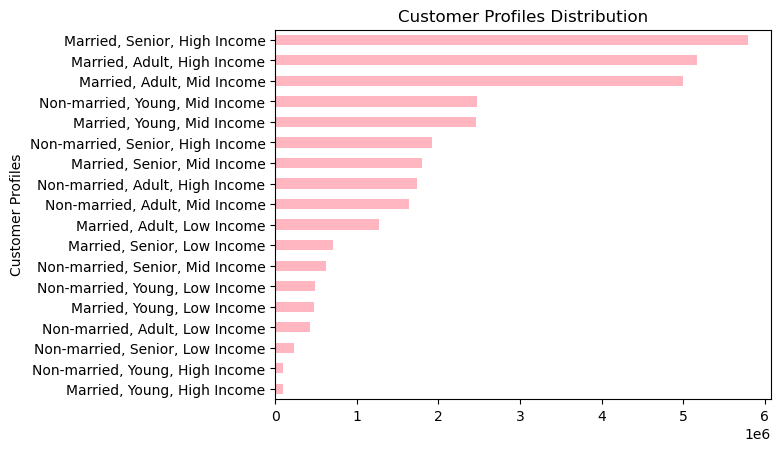

In [47]:
# Create Bar Chart for Distribution of Customer Profiles
bar_distrib_prof = instacart['Customer_Profile'].value_counts().sort_values(ascending=True).plot.barh(
    title='Customer Profiles Distribution',
    color= '#FFB6C1')
# Add title to axis Y
plt.ylabel('Customer Profiles')

In [48]:
# Export Bar Chart
bar_distrib_prof.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_distrib_prof.png'))

## 3.3. Profiles and Marital Status

In [49]:
# Create crosstab for Marital Status
crosstab_status = pd.crosstab(instacart['Marital_Status'], instacart['Customer_Profile'], dropna=False, normalize='index')

# Multiply the normalized values by 100 to get percentages
crosstab_status_percent = (crosstab_status * 100).round(0).astype(str) + '%'
crosstab_status_percent

Customer_Profile,"Married, Adult, High Income","Married, Adult, Low Income","Married, Adult, Mid Income","Married, Senior, High Income","Married, Senior, Low Income","Married, Senior, Mid Income","Married, Young, High Income","Married, Young, Low Income","Married, Young, Mid Income","Non-married, Adult, High Income","Non-married, Adult, Low Income","Non-married, Adult, Mid Income","Non-married, Senior, High Income","Non-married, Senior, Low Income","Non-married, Senior, Mid Income","Non-married, Young, High Income","Non-married, Young, Low Income","Non-married, Young, Mid Income"
Marital_Status,,,,,,,,,,,,,,,,,,
divorced/widowed,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,70.0%,8.0%,22.0%,0.0%,0.0%,0.0%
living with parents and siblings,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,3.0%,15.0%,82.0%
married,23.0%,6.0%,22.0%,25.0%,3.0%,8.0%,0.0%,2.0%,11.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%
single,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,33.0%,8.0%,31.0%,0.0%,0.0%,0.0%,1.0%,5.0%,23.0%


In [50]:
# Copy to clipboard before pasting in Excel
crosstab_status_percent.to_clipboard()

## 3.4. Profiles and Age

In [51]:
# Create crosstab for Age
crosstab_age = pd.crosstab(instacart['Age_Group'], instacart['Customer_Profile'], dropna=False, normalize='index')

# Multiply the normalized values by 100 to get percentages
crosstab_age_percent = (crosstab_age * 100).round(0).astype(str) + '%'
crosstab_age_percent

Customer_Profile,"Married, Adult, High Income","Married, Adult, Low Income","Married, Adult, Mid Income","Married, Senior, High Income","Married, Senior, Low Income","Married, Senior, Mid Income","Married, Young, High Income","Married, Young, Low Income","Married, Young, Mid Income","Non-married, Adult, High Income","Non-married, Adult, Low Income","Non-married, Adult, Mid Income","Non-married, Senior, High Income","Non-married, Senior, Low Income","Non-married, Senior, Mid Income","Non-married, Young, High Income","Non-married, Young, Low Income","Non-married, Young, Mid Income"
Age_Group,,,,,,,,,,,,,,,,,,
Adult,34.0%,8.0%,33.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,11.0%,3.0%,11.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%
Senior,0.0%,0.0%,0.0%,52.0%,6.0%,16.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,17.0%,2.0%,6.0%,0.0%,0.0%,0.0%
Young,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,2.0%,8.0%,40.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,2.0%,8.0%,41.0%


In [52]:
# Copy to clipboard before pasting in Excel
crosstab_age_percent.to_clipboard()

## 3.5. Profiles and Income

In [53]:
# Create crosstab for Income
crosstab_income = pd.crosstab(instacart['Income_Group'], instacart['Customer_Profile'], dropna=False, normalize='index')

# Multiply the normalized values by 100 to get percentages
crosstab_income_percent = (crosstab_income * 100).round(0).astype(str) + '%'
crosstab_income_percent

Customer_Profile,"Married, Adult, High Income","Married, Adult, Low Income","Married, Adult, Mid Income","Married, Senior, High Income","Married, Senior, Low Income","Married, Senior, Mid Income","Married, Young, High Income","Married, Young, Low Income","Married, Young, Mid Income","Non-married, Adult, High Income","Non-married, Adult, Low Income","Non-married, Adult, Mid Income","Non-married, Senior, High Income","Non-married, Senior, Low Income","Non-married, Senior, Mid Income","Non-married, Young, High Income","Non-married, Young, Low Income","Non-married, Young, Mid Income"
Income_Group,,,,,,,,,,,,,,,,,,
High Income,35.0%,0.0%,0.0%,39.0%,0.0%,0.0%,1.0%,0.0%,0.0%,12.0%,0.0%,0.0%,13.0%,0.0%,0.0%,1.0%,0.0%,0.0%
Low Income,0.0%,35.0%,0.0%,0.0%,20.0%,0.0%,0.0%,13.0%,0.0%,0.0%,12.0%,0.0%,0.0%,6.0%,0.0%,0.0%,14.0%,0.0%
Mid Income,0.0%,0.0%,36.0%,0.0%,0.0%,13.0%,0.0%,0.0%,18.0%,0.0%,0.0%,12.0%,0.0%,0.0%,4.0%,0.0%,0.0%,18.0%


In [54]:
# Copy to clipboard before pasting in Excel
crosstab_income_percent.to_clipboard()

## 3.6. Profiles and Dependants

In [55]:
# Create crosstab for Dependance
crosstab_dependance = pd.crosstab(instacart['Dependance'], instacart['Customer_Profile'], dropna=False, normalize='index')

# Multiply the normalized values by 100 to get percentages
crosstab_dependance_percent = (crosstab_dependance * 100).round(0).astype(str) + '%'
crosstab_dependance_percent

Customer_Profile,"Married, Adult, High Income","Married, Adult, Low Income","Married, Adult, Mid Income","Married, Senior, High Income","Married, Senior, Low Income","Married, Senior, Mid Income","Married, Young, High Income","Married, Young, Low Income","Married, Young, Mid Income","Non-married, Adult, High Income","Non-married, Adult, Low Income","Non-married, Adult, Mid Income","Non-married, Senior, High Income","Non-married, Senior, Low Income","Non-married, Senior, Mid Income","Non-married, Young, High Income","Non-married, Young, Low Income","Non-married, Young, Mid Income"
Dependance,,,,,,,,,,,,,,,,,,
Dependants,21.0%,5.0%,21.0%,24.0%,3.0%,7.0%,0.0%,2.0%,10.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,1.0%,5.0%
No-Dependants,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,22.0%,5.0%,20.0%,24.0%,3.0%,8.0%,1.0%,3.0%,15.0%


In [56]:
# Copy to clipboard before pasting in Excel
crosstab_dependance_percent.to_clipboard()

# 4. Analysis of Customer Profiles: 

## 4.1. Usage frequency using frequency_flag

instacart.groupby('Customer_Profile').agg({'frequency_flag': ['mean', 'min', 'max']})

## 4.2. Expenditure using spender_type_flag

instacart.groupby('Customer_Profile').agg({'spender_type_flag': ['mean', 'min', 'max']})

## 4.3. Regions

instacart.groupby('Customer_Profile').agg({'region': ['mean', 'min', 'max']})

## 4.4. Departments

instacart.groupby('Customer_Profile').agg({'department': ['mean', 'min', 'max']})

# 5. Exporting dataframe

In [57]:
# Export instacart dataframe
instacart.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacart.pkl'))